<a href="https://colab.research.google.com/github/nortonacosta/Imersao_python_dados/blob/main/Imers%C3%A3o_Python_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 1**

## Explorando dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape[0], df.shape[1]
print(f'Linhas: {linhas}, Colunas: {colunas}')

Linhas: 133349, Colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# Renomeando Colunas do Dataframe

In [9]:
traducao_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df = df.rename(columns=traducao_colunas)
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


# Analisando quais sãos as categorias das colunas categóricas

In [10]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [11]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [12]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [13]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


# Modificando o nome das categorias:

In [14]:
traducao_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(traducao_senioridade)

# Display the value counts after translation to confirm the changes
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [15]:
traducao_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(traducao_remoto)

# Display the value counts after translation to confirm the changes
df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [16]:
traducao_contrato = {
    'FT': 'integral',
    'CT': 'contrato',
    'PT': 'parcial',
    'FL': 'freelancer'
}

df['contrato'] = df['contrato'].replace(traducao_contrato)

# Display the value counts after translation to confirm the changes
df['contrato'].value_counts()

,count
contrato,
integral,132563
contrato,394
parcial,376
freelancer,16


In [17]:
traducao_tamanho_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(traducao_tamanho_empresa)

# Display the value counts after translation to confirm the changes
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [18]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [19]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [20]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 2

## Preparação e limpeza de Dados

In [21]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


*Verificando se há Dados nulos*

In [22]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
#verifica e conta o número de valores ausentes (nulos) em cada coluna do DataFrame df
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [24]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [25]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


# Exemplos de casos com valores nulos

Criando um Dataframe

In [26]:
import numpy as np
#criando uma base de teste para exemplificar valores nulos
df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniel", "Val"],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

In [27]:
#calcula a média salarial e substitui os valores nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

#calcula a mediana e substitui os valores nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniel,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [28]:
df_temperaturas = pd.DataFrame({
    'dia': ["segunda", "terça", "quarta", "quinta", "sexta"],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

In [29]:
df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].fillna(method='ffill')
df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].fillna(method='bfill')
df_temperaturas

/tmp/ipython-input-1944540447.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].fillna(method='ffill')
/tmp/ipython-input-1944540447.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].fillna(method='bfill')


,dia,temperatura,preenchido_ffill,preenchido_bfill
0,segunda,30.0,30.0,30.0
1,terça,NaN,30.0,28.0
2,quarta,NaN,30.0,28.0
3,quinta,28.0,28.0,28.0
4,sexta,27.0,27.0,27.0


In [30]:
df_cidades = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniel", "Val"],
    'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Balén"]
})

In [31]:
df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniel,NaN,Não informado
4,Val,Balén,Balén


# Excluindo dados de valiores Nulos

Como em toda base de dados temos apenas 10 capos com valores Nulos, optamos pela estratégia de excluir estes dados, pois não irá inteferir nas análises por conter poucos valores nulos

In [32]:
df_limpo = df.dropna()

In [33]:
#verifica e conta o número de valores ausentes (nulos) em cada coluna do DataFrame df
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [34]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [35]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [36]:
#tornando o campo ANO em um inteiro
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype(int))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [37]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


# Aula 3

Visualização de Dados

<Axes: title={'center': 'Quantidade de cargos por senioridade'}, xlabel='senioridade'>

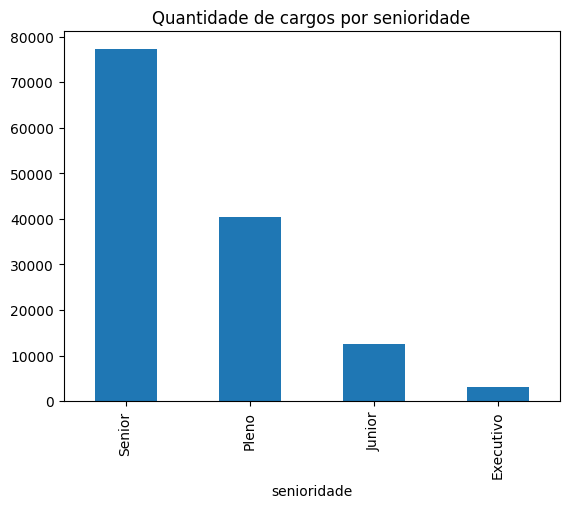

In [38]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Quantidade de cargos por senioridade')

Biblioteca Seabron:

A biblioteca Seaborn foi utilizada para criar visualizações estatísticas de forma mais atraente e informativa do que as visualizações padrão do Matplotlib. Ela se integra bem com o pandas e facilita a criação de gráficos complexos com poucas linhas de código

In [39]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='salario'>

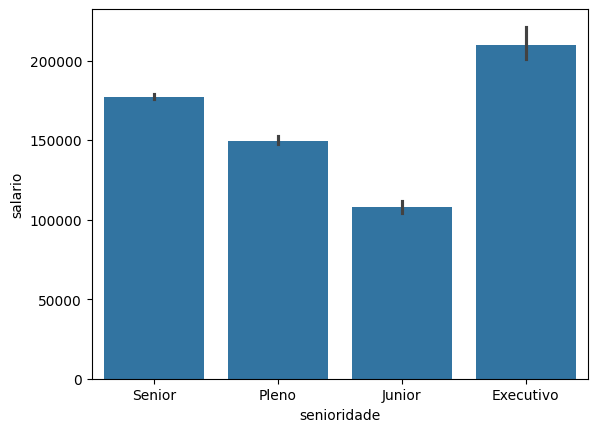

In [40]:
sns.barplot(data=df_limpo, x='senioridade', y='salario')

Melhorando com Biblioteca Matplotlib

In [41]:
import matplotlib.pyplot as plt

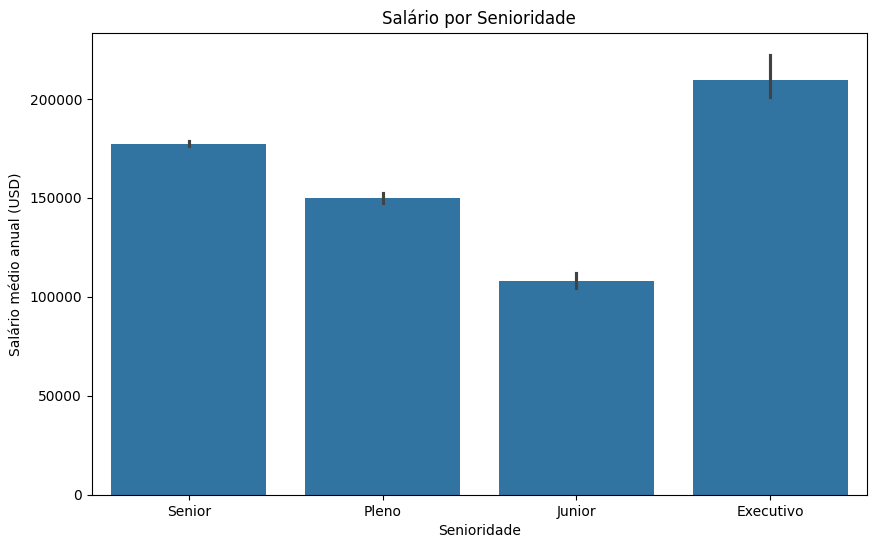

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_limpo, x='senioridade', y='salario')
plt.title('Salário por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [43]:
df_limpo.groupby('senioridade')['salario'].mean().sort_values(ascending=False)

,salario
senioridade,
Executivo,209678.705625
Senior,177359.251826
Pleno,149731.057783
Junior,108053.218552


Ordenando informações

In [44]:
salario_ordenado = df_limpo.groupby('senioridade')['salario'].mean().sort_values(ascending=False).index
salario_ordenado

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

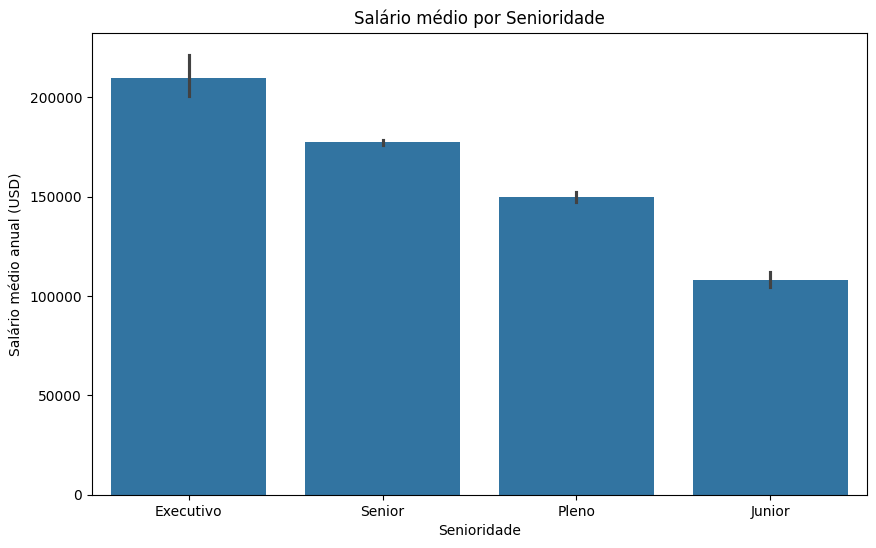

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_limpo, x='senioridade', y='salario',order=salario_ordenado)
plt.title('Salário médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

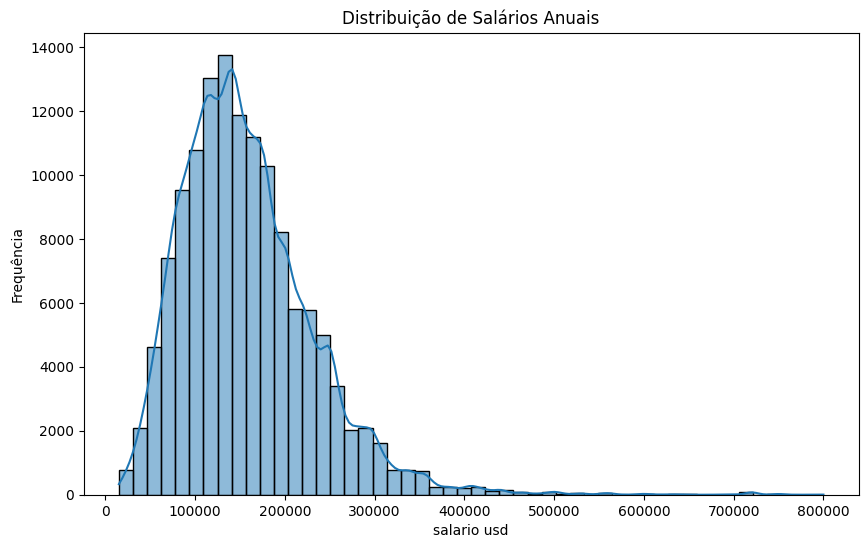

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição de Salários Anuais')
plt.xlabel('salario usd')
plt.ylabel('Frequência')
plt.show()

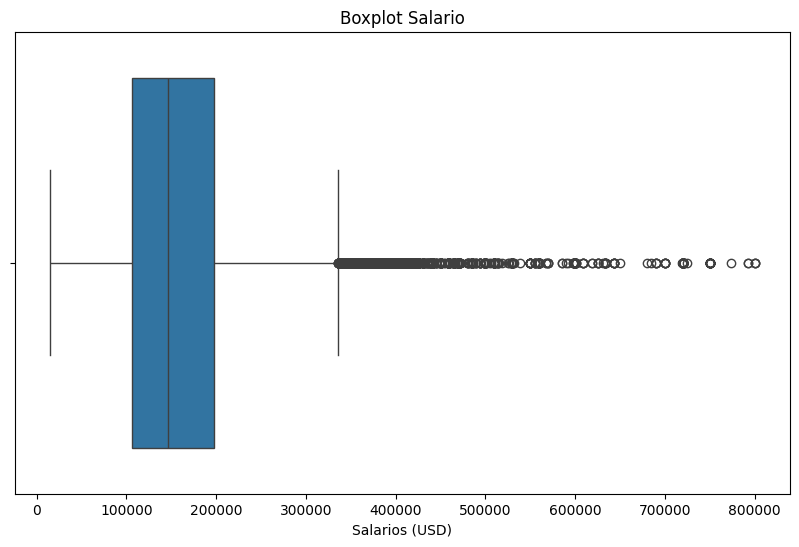

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot Salario')
plt.xlabel('Salarios (USD)')
plt.show()

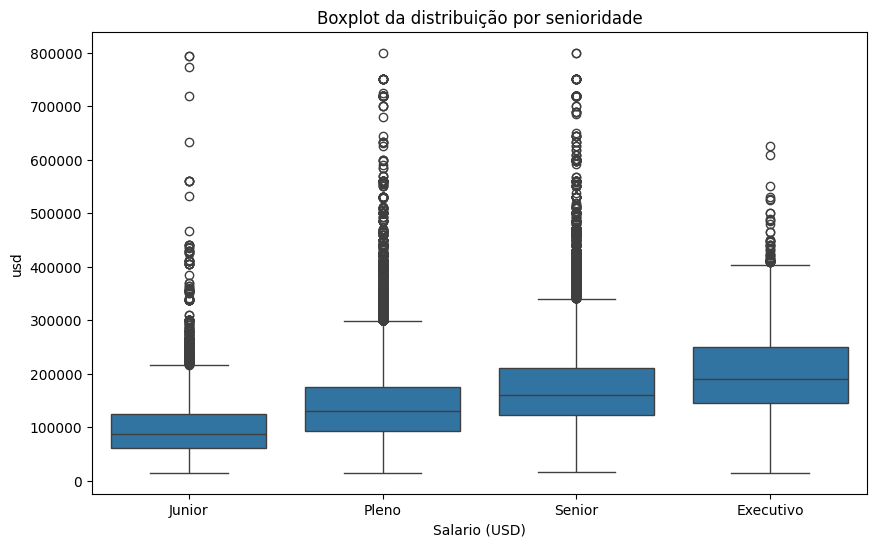

In [48]:
senioridade_ordem = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(10, 6))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=senioridade_ordem)
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Salario (USD)')
plt.show()

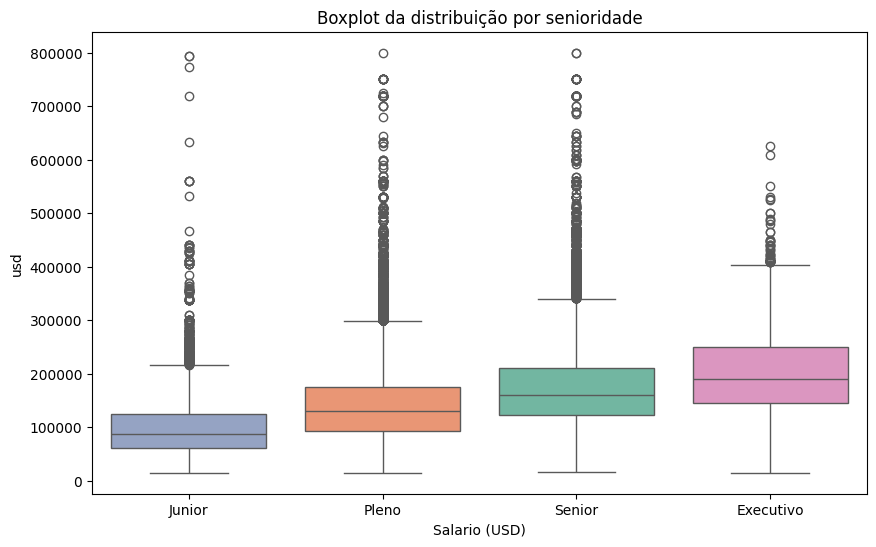

In [49]:
senioridade_ordem = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(10, 6))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=senioridade_ordem, palette='Set2', hue='senioridade')
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Salario (USD)')
plt.show()

In [50]:
import plotly.express as px

Utilizando a IA para gerar um novo tipo de gráfico

"crie um grafico de media salarial por senioridade em barras usando o plotly"

In [51]:
#Orompt: Crie um grafico de media salarial por senioridade em barras usando o plotly
salario_medio_senioridade = df_limpo.groupby('senioridade')['usd'].mean().reset_index()
salario_medio_senioridade = salario_medio_senioridade.sort_values('usd', ascending=False)

fig = px.bar(salario_medio_senioridade, x='senioridade', y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Senioridade', 'usd': 'Média Salarial (USD)'})
fig.show()

In [52]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de Trabalho'
             )
fig.show()

In [53]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de Trabalho',
             hole=0.5
             )
fig.show()

In [54]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de Trabalho',
             hole=0.5
             )
fig.update_traces(textinfo='percent+label')
fig.show()

# Mapa do salário médio do Cientista de Dados por país

Instalação de uma biblioteca para converter os códigos de residência, numa sigla que seja possível criar um mapa:



In [55]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.4 MB/s eta 0:00:00


In [56]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [57]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA
1,2025,Senior,integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA
2,2025,Pleno,integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025,Pleno,integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025,Junior,integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA


In [58]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)